<a href="https://colab.research.google.com/github/kelvinfoo123/PyTorch_Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

In [2]:
import torch 
import numpy as np 
import torch.nn as nn 
from sklearn import datasets 
import matplotlib.pyplot as plt 

In [3]:
# Generate dataset 
x_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) # Reshape y into a tensor with 1 column

n_samples, n_features = X.shape 

In [5]:
# Build model 
input_size = n_features 
output_size = 1 

model = nn.Linear(input_size, output_size)

In [7]:
# Loss and optimizer 
learning_rate = 0.01 

criterion = nn.MSELoss() # Mean squared error loss 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [10]:
# Training loop 
num_epochs = 100 

for epoch in range(num_epochs): 
  # Forward pass
  y_predicted = model(X)
  loss = criterion(y_predicted, y)
  
  # Backward pass 
  loss.backward()

  # Update 
  optimizer.step()
  optimizer.zero_grad()

  [w,b] = model.parameters()
  print(f'epoch {epoch + 1}: w ={w[0][0].item():.3f}, loss = {loss:.4f}')

epoch 1: w =3.005, loss = 5524.7964
epoch 2: w =4.261, loss = 5359.9023
epoch 3: w =5.497, loss = 5200.2949
epoch 4: w =6.713, loss = 5045.8042
epoch 5: w =7.910, loss = 4896.2632
epoch 6: w =9.089, loss = 4751.5117
epoch 7: w =10.248, loss = 4611.3945
epoch 8: w =11.389, loss = 4475.7612
epoch 9: w =12.512, loss = 4344.4678
epoch 10: w =13.617, loss = 4217.3730
epoch 11: w =14.704, loss = 4094.3413
epoch 12: w =15.774, loss = 3975.2407
epoch 13: w =16.827, loss = 3859.9456
epoch 14: w =17.863, loss = 3748.3323
epoch 15: w =18.883, loss = 3640.2815
epoch 16: w =19.887, loss = 3535.6790
epoch 17: w =20.875, loss = 3434.4141
epoch 18: w =21.847, loss = 3336.3774
epoch 19: w =22.803, loss = 3241.4663
epoch 20: w =23.745, loss = 3149.5801
epoch 21: w =24.671, loss = 3060.6206
epoch 22: w =25.583, loss = 2974.4944
epoch 23: w =26.480, loss = 2891.1096
epoch 24: w =27.363, loss = 2810.3787
epoch 25: w =28.232, loss = 2732.2158
epoch 26: w =29.088, loss = 2656.5391
epoch 27: w =29.929, loss =

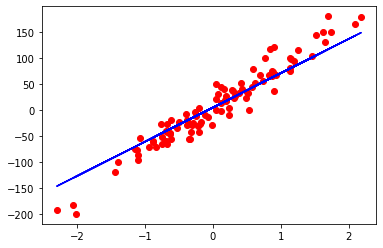

In [12]:
predicted = model(X).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()